In [2]:
import pandas as pd # 데이터분석도구(라이브러리) 불러오고 pd 라는 별칭으로 부르겠다. 데이터를 데이터프레임(표)형태로 다루게 함
import matplotlib.pyplot as plt # matplotlib 라이브러리의 pyplot 이라는 도구를 plt 라는 이름으로 불러옴. 그래프나 차트 그릴 때 사용
import seaborn as sns # seaborn 시각화라이브러리를 sns 라는 이름으로 불러옴. matplotlib 보다 예쁘고 직관적

# 데이터 불러오기
df = pd.read_csv("life-expectancy-vs-healthcare-expenditure.csv")

print("Hello, world!")

Hello, world!


In [3]:
# 데이터 확인 : 첫부분만 확인 (head), 끝부분만 (tail)
print(df.head())

        Entity Code  Year  life_expectancy__sex_all__age_0__variant_estimates  \
0  Afghanistan  AFG  1950                                             28.156    
1  Afghanistan  AFG  1951                                             28.584    
2  Afghanistan  AFG  1952                                             29.014    
3  Afghanistan  AFG  1953                                             29.452    
4  Afghanistan  AFG  1954                                             29.698    

   sh_xpd_chex_pp_cd  population_historical owid_region  
0                NaN              7776133.0         NaN  
1                NaN              7879295.0         NaN  
2                NaN              7987737.0         NaN  
3                NaN              8096656.0         NaN  
4                NaN              8207910.0         NaN  


In [4]:
# 기대수명 또는 의료비 또는 국가명이 비어 있는 행(줄)은 다 삭제하고, 
# 비어 있지 않은 데이터만 모아서 df_clean 이라는 새 데이터프레임을 만든다!
# df.dropna (결측치 있으면 삭제) subset 에서 ''이름의 column 만 남기고
df_clean = df.dropna(subset=['Entity', 'life_expectancy__sex_all__age_0__variant_estimates', 'sh_xpd_chex_pp_cd'])

In [5]:
# 국가별 가장 오래된 연도 데이터
# df_clean 에서 entitiy 를 기준으로 grouping 하고 year column 을 가져와서 가장 작은 수의 idx 를 찾아서 df_clean.loc 그 행을 가져온다
oldest = df_clean.loc[df_clean.groupby('Entity')['Year'].idxmin()]
oldest = oldest[['Entity', 'Year', 'life_expectancy__sex_all__age_0__variant_estimates', 'sh_xpd_chex_pp_cd']]
oldest = oldest.rename(columns={
    'Year': 'Oldest_Year',
    'life_expectancy__sex_all__age_0__variant_estimates': 'LifeExp_Old',
    'sh_xpd_chex_pp_cd': 'HealthExp_Old'
})

print(oldest)


            Entity  Oldest_Year  LifeExp_Old  HealthExp_Old
52     Afghanistan         2002       56.225      87.396550
654        Albania         2000       74.826     222.817460
915        Algeria         2000       70.576     296.928200
1366       Andorra         2000       81.863    1913.580600
1627        Angola         2000       46.501      62.355495
...            ...          ...          ...            ...
58312      Vietnam         2000       72.746     104.852120
58773        World         2000       66.433     591.752000
58899        Yemen         2000       62.761     128.947250
59286       Zambia         2000       46.577      72.213750
59557     Zimbabwe         2010       51.925     189.670760

[195 rows x 4 columns]


In [6]:
# 국가별 가장 최신 연도 데이터
newest = df_clean.loc[df_clean.groupby('Entity')['Year'].idxmax()]
newest = newest[['Entity', 'Year', 'life_expectancy__sex_all__age_0__variant_estimates', 'sh_xpd_chex_pp_cd']]
newest = newest.rename(columns={
    'Year': 'Newest_Year',
    'life_expectancy__sex_all__age_0__variant_estimates': 'LifeExp_New',
    'sh_xpd_chex_pp_cd': 'HealthExp_New'
})

print(newest)

            Entity  Newest_Year  LifeExp_New  HealthExp_New
71     Afghanistan         2021       60.417     363.611180
675        Albania         2021       76.844    1131.669100
936        Algeria         2021       75.208     672.252500
1387       Andorra         2021       82.331    4907.773400
1648        Angola         2021       62.958     198.546310
...            ...          ...          ...            ...
58333      Vietnam         2021       74.145     536.337900
58794        World         2021       70.865    1631.510600
58914        Yemen         2015       66.761     102.291280
59307       Zambia         2021       62.363     235.549760
59568     Zimbabwe         2021       60.135      63.136967

[195 rows x 4 columns]


In [7]:
# 오래된 데이터와 최신 데이터 합치기
df_compare = pd.merge(oldest, newest, on='Entity')

df_compare.head()

,Entity,Oldest_Year,LifeExp_Old,HealthExp_Old,Newest_Year,LifeExp_New,HealthExp_New
0,Afghanistan,2002,56.225,87.396550,2021,60.417,363.61118
1,Albania,2000,74.826,222.817460,2021,76.844,1131.66910
2,Algeria,2000,70.576,296.928200,2021,75.208,672.25250
3,Andorra,2000,81.863,1913.580600,2021,82.331,4907.77340
4,Angola,2000,46.501,62.355495,2021,62.958,198.54631


In [8]:
# 증가 비율 계산
df_compare['LifeExp_Growth_pct'] = ((df_compare['LifeExp_New'] - df_compare['LifeExp_Old']) / df_compare['LifeExp_Old']) * 100
df_compare['HealthExp_Growth_pct'] = ((df_compare['HealthExp_New'] - df_compare['HealthExp_Old']) / df_compare['HealthExp_Old']) * 100

df_compare.head()

,Entity,Oldest_Year,LifeExp_Old,HealthExp_Old,Newest_Year,LifeExp_New,HealthExp_New,LifeExp_Growth_pct,HealthExp_Growth_pct
0,Afghanistan,2002,56.225,87.396550,2021,60.417,363.61118,7.455758,316.047521
1,Albania,2000,74.826,222.817460,2021,76.844,1131.66910,2.696924,407.890674
2,Algeria,2000,70.576,296.928200,2021,75.208,672.25250,6.563138,126.402376
3,Andorra,2000,81.863,1913.580600,2021,82.331,4907.77340,0.571687,156.470692
4,Angola,2000,46.501,62.355495,2021,62.958,198.54631,35.390637,218.410286


국가별로 의료비 증가율과 기대수명 증가율이 서로 상관성이 있는가?

In [9]:
# 국가별로 의료비 증가율과 기대수명 증가율이 서로 상관성이 있는가?
# 두 변수(의료비 증가율 vs 기대수명 증가율) 사이의 상관계수(피어슨 r)를 계산: df_compare['HealthExp_Growth_pct'].corr(다른 변수)
# 결과값: -1 ~ +1 사이의 숫자가 나옴 (상관성의 정도)
# f"...": f-string → 변수 값을 문자열에 넣는 방법
corr = df_compare['HealthExp_Growth_pct'].corr(df_compare['LifeExp_Growth_pct'])
print(f"상관계수: {corr}")

상관계수: 0.03399689806331943


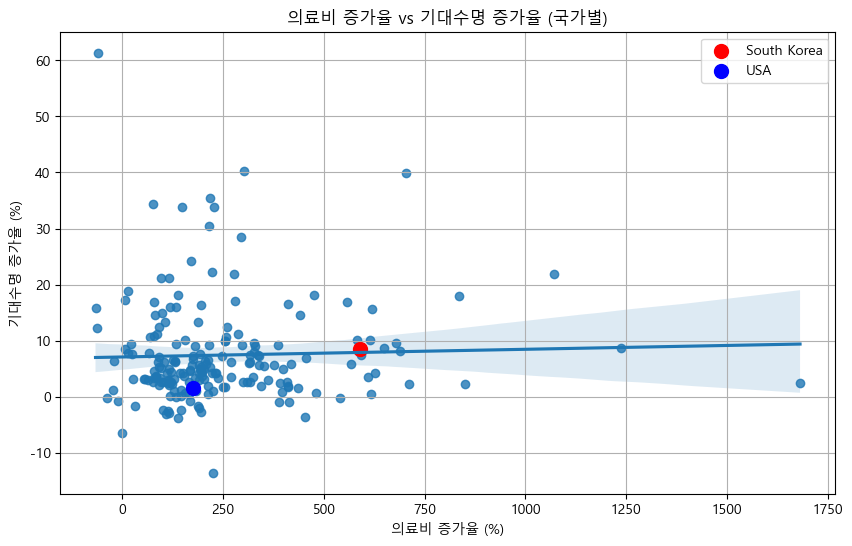

In [10]:
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 부호 깨짐 방지

# 새로운 그래프(figure) 생성, 그래프 크기를 가로 10, 세로 6 (inch) 로 지정
plt.figure(figsize=(10, 6))
# 산점도(Scatter plot) + 추세선(Regression line) 그리기
# 점들을 찍음 (각 점 = 한 국가), 추세선도 자동으로 그려줌 (선형 회귀선), 두 변수 사이의 관계(상관성)를 시각적으로 보여줌
# 선형회귀선: 데이터의 점들 사이에 가장 잘 맞는 직선 = 데이터들이 x축(의료비 증가율)과 y축(기대수명 증가율)에 퍼져 있을 때, "이 데이터들을 가장 잘 설명하는 직선" 을 찾는 거예요.
sns.regplot(
    x=df_compare['HealthExp_Growth_pct'],
    y=df_compare['LifeExp_Growth_pct']
)
plt.xlabel('의료비 증가율 (%)')
plt.ylabel('기대수명 증가율 (%)')
plt.title('의료비 증가율 vs 기대수명 증가율 (국가별)')
# 그래프에 격자(grid) 추가
plt.grid(True)
# 그래프 화면에 출력

# 👉 국가명을 점 옆에 표시
# df_compare.shape[0] → 행(row)의 개수 (국가 수)
"""
for i in range(df_compare.shape[0]):
    plt.text(
        df_compare['HealthExp_Growth_pct'].iloc[i], # x-axis
        df_compare['LifeExp_Growth_pct'].iloc[i], # y-axis
        df_compare['Entity'].iloc[i], #점의 name
        fontsize=8
    )
"""

# 👉 대한민국만 빨간 점으로 강조!
korea = df_compare[df_compare['Entity'] == 'South Korea']
usa = df_compare[df_compare['Entity'] == 'United States']
plt.scatter(
    korea['HealthExp_Growth_pct'],
    korea['LifeExp_Growth_pct'],
    color='red', 
    s=100, # 점 크기
    label='South Korea' # 범례에 추가할 이름 
)
plt.scatter(
    usa['HealthExp_Growth_pct'],
    usa['LifeExp_Growth_pct'],
    color='blue', 
    s=100, # 점 크기
    label='USA' # 범례에 추가할 이름 
)
plt.legend() # 범례 표시
plt.savefig("life_medexp_rate_scatter.png", dpi=300, bbox_inches='tight')
plt.show()

# ✔ 산점도:
# 점들이 추세선(직선) 주변에 촘촘하게 모여 있지 않고 넓게 퍼져 있음.
# 특히 의료비 증가율이 큰 국가들(오른쪽 끝) 에서 기대수명 증가율이 들쭉날쭉.

# ✔ 추세선:
# 기울기가 거의 0 (수평에 가까움).
# 의료비 증가율이 높아져도 기대수명 증가율이 특별히 높아지지 않음.

# ✔ 신뢰구간 (파란 그림자 부분):
# 폭이 넓음 → 데이터 변동성이 크고, 예측이 불확실하다는 뜻.

# "의료비 지출이 많이 늘었다고 해서 기대수명이 그만큼 늘지는 않았다."

국가별로 의료비 증가량과 기대수명 증가량이 서로 상관성이 있는가?

In [11]:
df_compare['LifeExp_Growth'] = df_compare['LifeExp_New'] - df_compare['LifeExp_Old']
df_compare['HealthExp_Growth'] = df_compare['HealthExp_New'] - df_compare['HealthExp_Old']

df_compare.head()

,Entity,Oldest_Year,LifeExp_Old,HealthExp_Old,Newest_Year,LifeExp_New,HealthExp_New,LifeExp_Growth_pct,HealthExp_Growth_pct,LifeExp_Growth,HealthExp_Growth
0,Afghanistan,2002,56.225,87.396550,2021,60.417,363.61118,7.455758,316.047521,4.192,276.214630
1,Albania,2000,74.826,222.817460,2021,76.844,1131.66910,2.696924,407.890674,2.018,908.851640
2,Algeria,2000,70.576,296.928200,2021,75.208,672.25250,6.563138,126.402376,4.632,375.324300
3,Andorra,2000,81.863,1913.580600,2021,82.331,4907.77340,0.571687,156.470692,0.468,2994.192800
4,Angola,2000,46.501,62.355495,2021,62.958,198.54631,35.390637,218.410286,16.457,136.190815


In [12]:
corr = df_compare['HealthExp_Growth'].corr(df_compare['LifeExp_Growth'])
print(f"상관계수 (증가량 기준): {corr}")

상관계수 (증가량 기준): -0.20084172128013983


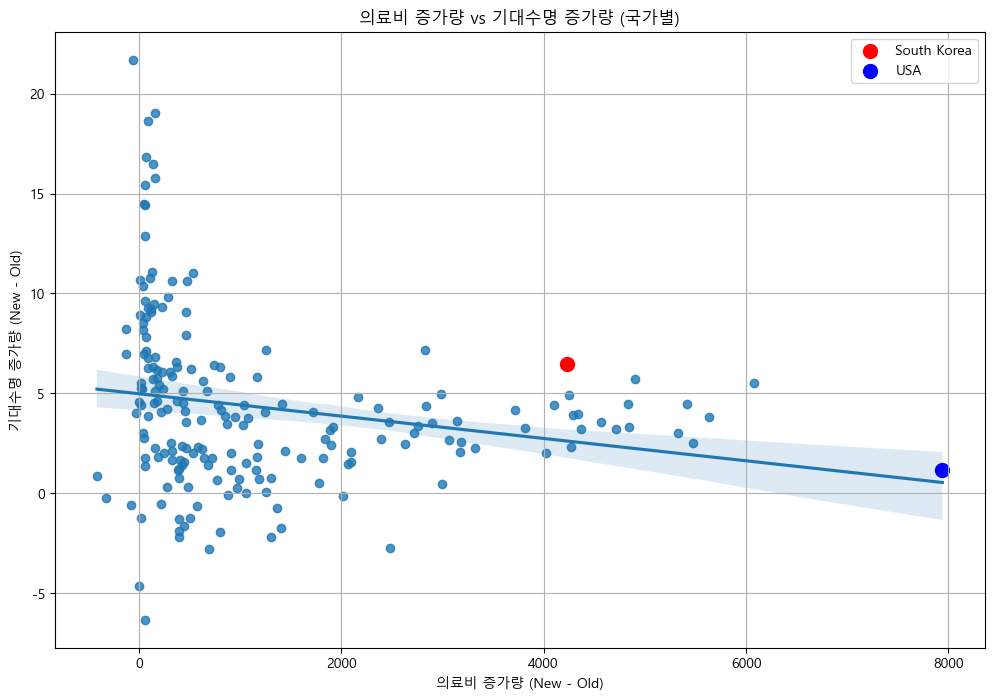

'\n산점도:\n의료비가 거의 늘지 않은 국가들(왼쪽에 몰림) → 기대수명은 그래도 꽤 늘어난 경우가 많음.\n의료비가 많이 증가한 국가들(오른쪽 끝) → 기대수명 증가량이 생각보다 크지 않음.\n\n추세선:\n내려가는 기울기(음의 상관관계).\n의료비 증가량이 클수록 오히려 기대수명 증가량은 줄어드는 경향성이 약하게 보임.\n\n신뢰구간(파란 그림자):\n여전히 넓음 → 데이터 변동성이 크고, 이 관계가 아주 강하진 않다는 뜻.\n\n의료비 증가량과 기대수명 증가량은 약한 음의 상관관계를 보인다.\n\n→ 의료비를 더 많이 쓴 나라일수록 기대수명 증가폭은 작았을 가능성이 있음\n(특히 이미 기대수명이 높은 선진국은 더 늘리기 어려움 → "한계효용 체감" 현상과 비슷한 패턴)\n'

In [13]:
plt.figure(figsize=(12, 8))
sns.regplot(
    x=df_compare['HealthExp_Growth'],
    y=df_compare['LifeExp_Growth']
)
plt.xlabel('의료비 증가량 (New - Old)')
plt.ylabel('기대수명 증가량 (New - Old)')
plt.title('의료비 증가량 vs 기대수명 증가량 (국가별)')
plt.grid(True)

korea = df_compare[df_compare['Entity'] == 'South Korea']
usa = df_compare[df_compare['Entity'] == 'United States']
plt.scatter(
    korea['HealthExp_Growth'],
    korea['LifeExp_Growth'],
    color='red',
    s=100,
    label='South Korea'
)
plt.scatter(
    usa['HealthExp_Growth'],
    usa['LifeExp_Growth'],
    color='blue', 
    s=100, # 점 크기
    label='USA' # 범례에 추가할 이름 
)

plt.legend()
plt.show()

"""
산점도:
의료비가 거의 늘지 않은 국가들(왼쪽에 몰림) → 기대수명은 그래도 꽤 늘어난 경우가 많음.
의료비가 많이 증가한 국가들(오른쪽 끝) → 기대수명 증가량이 생각보다 크지 않음.

추세선:
내려가는 기울기(음의 상관관계).
의료비 증가량이 클수록 오히려 기대수명 증가량은 줄어드는 경향성이 약하게 보임.

신뢰구간(파란 그림자):
여전히 넓음 → 데이터 변동성이 크고, 이 관계가 아주 강하진 않다는 뜻.

의료비 증가량과 기대수명 증가량은 약한 음의 상관관계를 보인다.

→ 의료비를 더 많이 쓴 나라일수록 기대수명 증가폭은 작았을 가능성이 있음
(특히 이미 기대수명이 높은 선진국은 더 늘리기 어려움 → "한계효용 체감" 현상과 비슷한 패턴)
"""


의료비 높은 순서, 기대수명 높은 순서로 정렬

In [14]:
# 의료비 지출 높은 순서
df_compare_sorted_exp = df_compare.sort_values(by='HealthExp_New', ascending=False)
df_compare_sorted_exp[['Entity', 'HealthExp_New', 'LifeExp_New']].head(10)

# index 리셋 (순위를 알기 쉽게)
df_compare_sorted_exp = df_compare_sorted_exp.reset_index(drop=True)

# 대한민국의 순위
rank_korea = df_compare_sorted_exp[df_compare_sorted_exp['Entity'] == 'South Korea'].index[0] + 1  # 순위는 0부터 시작하니까 +1
print(f"대한민국 의료비 순위: {rank_korea}위")

korea_row = df_compare_sorted_exp[df_compare_sorted_exp['Entity'] == 'South Korea']
print(korea_row)

rank_usa = df_compare_sorted_exp[df_compare_sorted_exp['Entity'] == 'United States'].index[0] + 1  # 순위는 0부터 시작하니까 +1
print(f"미국 의료비 순위: {rank_usa}위")

usa_row = df_compare_sorted_exp[df_compare_sorted_exp['Entity'] == 'United States']
print(usa_row)

total_rank = df_compare_sorted_exp.shape[0]
print(f"총 {total_rank}개 국가가 있음")


대한민국 의료비 순위: 23위
         Entity  Oldest_Year  LifeExp_Old  HealthExp_Old  Newest_Year  \
22  South Korea         2000       76.235       718.1075         2022   

    LifeExp_New  HealthExp_New  LifeExp_Growth_pct  HealthExp_Growth_pct  \
22       82.727       4946.783            8.515774            588.863854   

    LifeExp_Growth  HealthExp_Growth  
22           6.492         4228.6755  
미국 의료비 순위: 1위
          Entity  Oldest_Year  LifeExp_Old  HealthExp_Old  Newest_Year  \
0  United States         2000       76.806       4533.826         2022   

   LifeExp_New  HealthExp_New  LifeExp_Growth_pct  HealthExp_Growth_pct  \
0       77.979      12473.791            1.527224            175.127255   

   LifeExp_Growth  HealthExp_Growth  
0           1.173          7939.965  
총 195개 국가가 있음


In [15]:
# 기대수명 높은 순서
df_compare_sorted_life = df_compare.sort_values(by='LifeExp_New', ascending=False)
df_compare_sorted_life.head(10)

df_compare_sorted_life = df_compare_sorted_life.reset_index(drop=True)

# 대한민국의 순위
rank_korea2 = df_compare_sorted_life[df_compare_sorted_life['Entity'] == 'South Korea'].index[0] + 1  # 순위는 0부터 시작하니까 +1
print(f"대한민국 기대수명 순위: {rank_korea2}위")

rank_usa2 = df_compare_sorted_life[df_compare_sorted_life['Entity'] == 'United States'].index[0] + 1  # 순위는 0부터 시작하니까 +1
print(f"미국 기대수명 순위: {rank_usa2}위")

대한민국 기대수명 순위: 10위
미국 기대수명 순위: 41위


군집 분석

In [16]:
from sklearn.cluster import KMeans

# 변수 선택
X = df_compare[['HealthExp_Growth', 'LifeExp_Growth']]

# 클러스터 3개로 나누기
kmeans = KMeans(n_clusters=3, random_state=0) #난수 0으로 설정하여 결과값 고정
df_compare['Cluster'] = kmeans.fit_predict(X)

# 결과 확인
print(df_compare[['Entity', 'Cluster']])


          Entity  Cluster
0    Afghanistan        0
1        Albania        0
2        Algeria        0
3        Andorra        2
4         Angola        0
..           ...      ...
190      Vietnam        0
191        World        0
192        Yemen        0
193       Zambia        0
194     Zimbabwe        0

[195 rows x 2 columns]


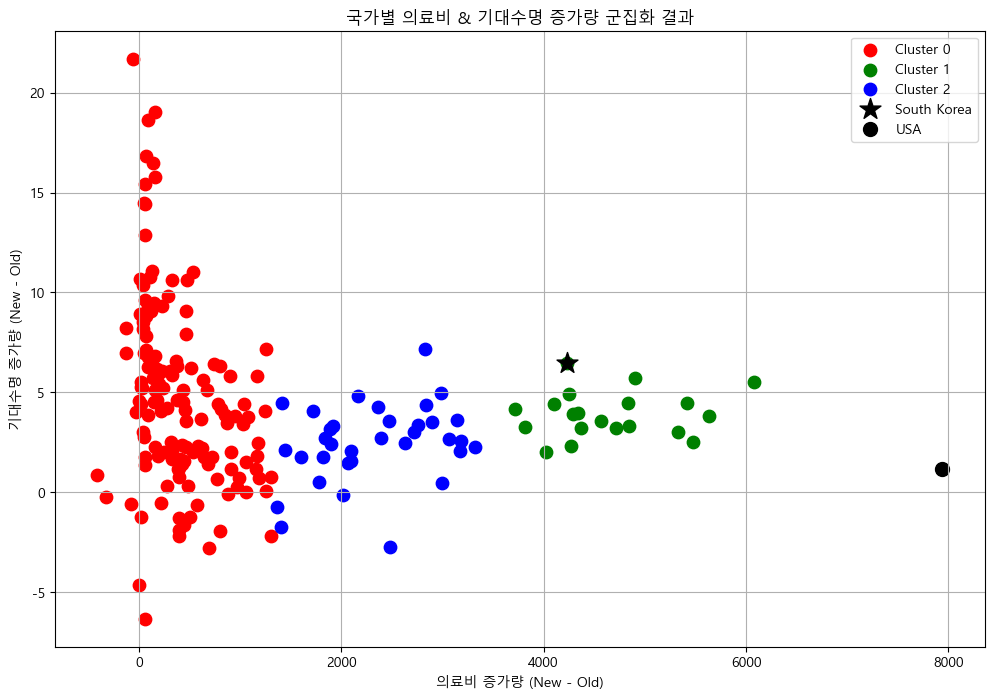

In [17]:
plt.figure(figsize=(12, 8))

# 각 클러스터별로 다른 색으로 점 찍기
colors = ['red', 'green', 'blue']  # 3개의 클러스터 → 색 3개

for cluster in range(3):
    cluster_data = df_compare[df_compare['Cluster'] == cluster]
    plt.scatter(
        cluster_data['HealthExp_Growth'],
        cluster_data['LifeExp_Growth'],
        label=f'Cluster {cluster}',
        color=colors[cluster],
        s=80
    )

korea = df_compare[df_compare['Entity'] == 'South Korea']
plt.scatter(
    korea['HealthExp_Growth'],
    korea['LifeExp_Growth'],
    color='black',
    marker='*',
    s=250,
    label='South Korea'
)

usa = df_compare[df_compare['Entity'] == 'United States']
plt.scatter(
    usa['HealthExp_Growth'],
    usa['LifeExp_Growth'],
    color='black',
    s=100,
    label='USA'
)
"""
for i in range(df_compare.shape[0]):
    plt.text(
        df_compare['HealthExp_Growth'].iloc[i], # x-axis
        df_compare['LifeExp_Growth'].iloc[i], # y-axis
        df_compare['Entity'].iloc[i], #점의 name
        fontsize=8
    )
"""

plt.xlabel('의료비 증가량 (New - Old)')
plt.ylabel('기대수명 증가량 (New - Old)')
plt.title('국가별 의료비 & 기대수명 증가량 군집화 결과')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
for cluster in range(3):
    print(f"\n===== Cluster {cluster} 국가 목록 =====")
    countries = df_compare[df_compare['Cluster'] == cluster]['Entity'].tolist()
    print(countries)



===== Cluster 0 국가 목록 =====
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Botswana', 'Brazil', 'Brunei', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Democratic Republic of Congo', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Low-income countries', 'Lower-middle-income countries', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali

In [19]:
oecd_countries = [
    'Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia',
    'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
    'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy',
    'Japan', 'South Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico',
    'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovak Republic',
    'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States'
]

df_oecd = df_compare[df_compare['Entity'].isin(oecd_countries)]

for cluster in range(3):
    countries = df_oecd[df_oecd['Cluster'] == cluster]['Entity'].tolist()
    print(f"\n===== Cluster {cluster} : OECD 국가 (총 {len(countries)}개) =====")
    print(countries)



===== Cluster 0 : OECD 국가 (총 3개) =====
['Colombia', 'Mexico', 'Turkey']

===== Cluster 1 : OECD 국가 (총 17개) =====
['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland', 'France', 'Germany', 'Ireland', 'Luxembourg', 'Netherlands', 'Norway', 'South Korea', 'Sweden', 'Switzerland', 'United Kingdom', 'United States']

===== Cluster 2 : OECD 국가 (총 16개) =====
['Chile', 'Czechia', 'Estonia', 'Greece', 'Hungary', 'Iceland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Lithuania', 'New Zealand', 'Poland', 'Portugal', 'Slovenia', 'Spain']


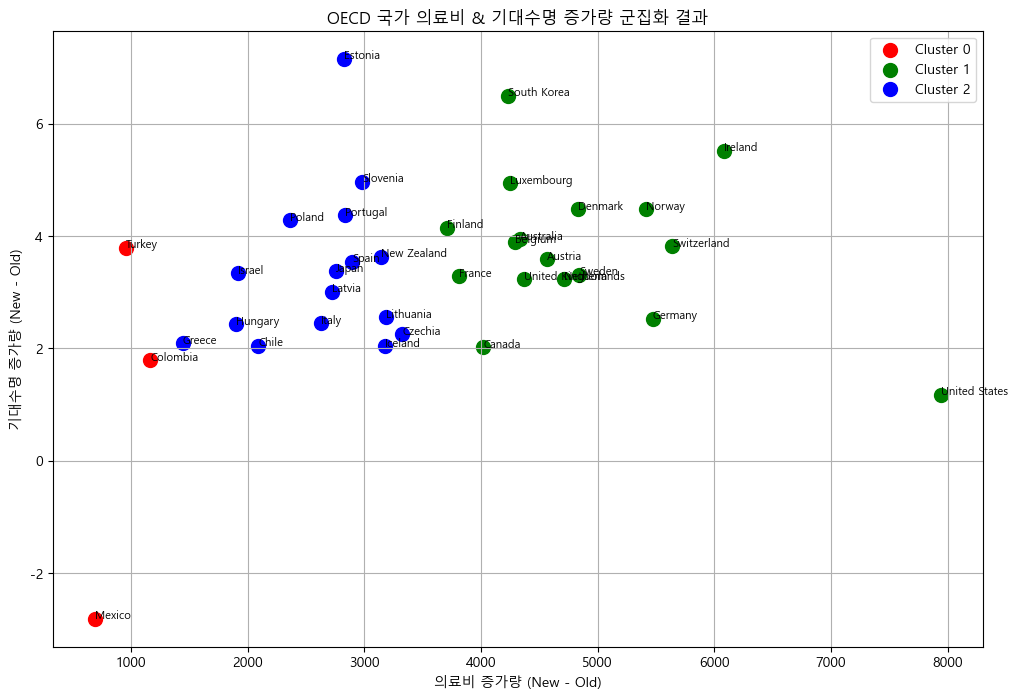

In [20]:
plt.figure(figsize=(12, 8))

colors = ['red', 'green', 'blue']

for cluster in range(3):
    cluster_data = df_oecd[df_oecd['Cluster'] == cluster]
    plt.scatter(
        cluster_data['HealthExp_Growth'],
        cluster_data['LifeExp_Growth'],
        label=f'Cluster {cluster}',
        color=colors[cluster],
        s=100
    )

plt.xlabel('의료비 증가량 (New - Old)')
plt.ylabel('기대수명 증가량 (New - Old)')
plt.title('OECD 국가 의료비 & 기대수명 증가량 군집화 결과')
plt.legend()
plt.grid(True)


for i in range(df_oecd.shape[0]):
    plt.text(
        df_oecd['HealthExp_Growth'].iloc[i],
        df_oecd['LifeExp_Growth'].iloc[i],
        df_oecd['Entity'].iloc[i],
        fontsize=8
    )

plt.show()
